## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

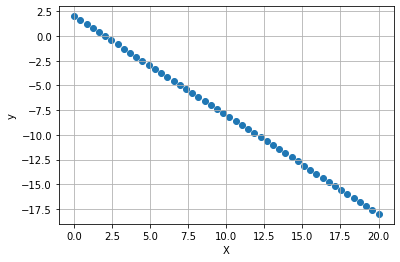

In [ ]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [ ]:
def ADA(X,y,alpha,max_iteration,epslon):

    count = 0
    theta_0 = 0
    theta_1 = 0
    m = len(X)
    loss = []
    All_Theta_0 = []
    All_Theta_1 = []
    V0 = 0
    V1 = 0
    all_perdction=[]


    while count < max_iteration:




        print(f' ****************** Iteration {count} ********************')



        y_pred = theta_0 + theta_1 *  X
        print("h(x) :  ",y_pred)
        all_perdction.append(y_pred)

        Error_Vector = (y_pred - y)
        print("Error_Vector :   ",Error_Vector)

        cost =  ( Error_Vector.dot(Error_Vector)) /2/m
        print("j =",cost)

        loss.append(cost)

        d_theta_0 = (1/m) * sum((y_pred - y))
        d_theta_1 = (1/m) * np.dot(y_pred - y , X)

        Gradient_Vector = np.array([d_theta_0,d_theta_1]).reshape(-1, 1)
        print("Gradient Vector:"  ,  Gradient_Vector)


        norm = np.linalg.norm([d_theta_0,d_theta_1])
        print("Gradient Vector Norm:   ",norm)

        V0 =  V0 +   (d_theta_0**2)
        V1 =  V1 +   (d_theta_1**2)
        print("V0",V0)
        print("V1",V1)



        Ad_lr0 = alpha/(np.sqrt(V0) + epslon)
        Ad_lr1 = alpha/(np.sqrt(V1) + epslon)

        theta_0 = theta_0 - Ad_lr0 * d_theta_0
        theta_1 = theta_1 - Ad_lr1 * d_theta_1

        print("theta_0_new :     ",theta_0)
        print("theta_0_new :     ",theta_1)

        All_Theta_0.append(theta_0)
        All_Theta_1.append(theta_1)




        print("v_0",V0)
        print("v_1",V1)





        count += 1
        if norm < 0.001:
                break

        if count>1:
            # Stopping using cost
            if abs(loss[-1]-loss[-2]) < 0.001:
              break



    return theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1




theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= ADA(X,y,0.05,500,1e-08)
print("****************** Training Report ********************")

print(f'Gradient Descent converged after {count} epochs')
print("theta_0_Opt",theta_0)
print("theta_1_Opt",theta_1)

print("Error Vector:",Error_Vector)
print("cost",cost)
print("h(x) = y_predict:",y_pred)
print("y_actual:",y)


Streaming output truncated to the last 5000 lines.
  1.52234718  1.66024431  1.79814144  1.93603857  2.0739357   2.21183283
  2.34972996  2.48762709  2.62552422  2.76342135  2.90131848  3.03921561
  3.17711274  3.31500986  3.45290699  3.59080412  3.72870125  3.86659838
  4.00449551  4.14239264]
j = 2.2717827710762144
Gradient Vector: [[ 0.76391297]
 [19.36038569]]
Gradient Vector Norm:    19.375450891742567
V0 1108.567755450405
V1 271559.4332857969
theta_0_new :      -0.6157138889943636
theta_0_new :      -0.6640096298568454
v_0 1108.567755450405
v_1 271559.4332857969
 ****************** Iteration 102 ********************
h(x) :   [ -0.61571389  -0.88673823  -1.15776257  -1.42878691  -1.69981124
  -1.97083558  -2.24185992  -2.51288426  -2.7839086   -3.05493294
  -3.32595728  -3.59698161  -3.86800595  -4.13903029  -4.41005463
  -4.68107897  -4.95210331  -5.22312765  -5.49415199  -5.76517632
  -6.03620066  -6.307225    -6.57824934  -6.84927368  -7.12029802
  -7.39132236  -7.6623467   -7.

In [ ]:
from sklearn.metrics import r2_score
print("r2_score:",r2_score(y,y_pred))

r2_score: 0.9484638125790851


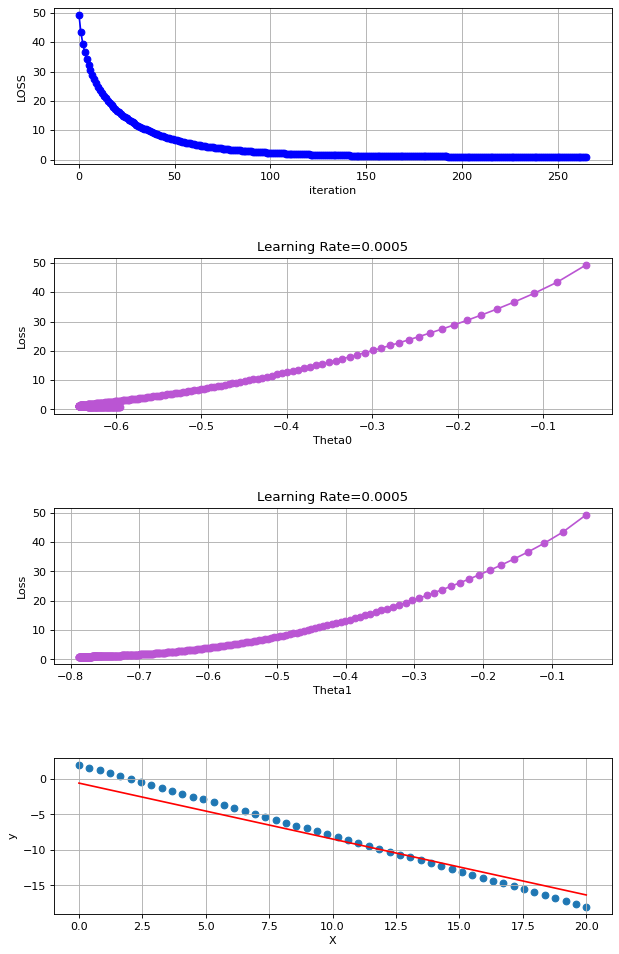

In [ ]:
fig=plt.figure(figsize=(9,15),dpi=80)
fig.subplots_adjust(hspace=0.6)

plt.subplot(4, 1, 1)
itration=list(range(len(loss)))
plt.plot(itration,loss,'o-',color="blue")
plt.xlabel("iteration")
plt.ylabel("LOSS")
plt.grid()

plt.subplot(4, 1, 2)
plt.title('Learning Rate=0.0005')
plt.plot(All_Theta_0,loss, 'o-',color="mediumorchid")
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.grid()

plt.subplot(4, 1, 3)
plt.title('Learning Rate=0.0005')
plt.plot(All_Theta_1 ,loss, 'o-',color="mediumorchid")
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.grid()


plt.subplot(4, 1, 4)
plt.scatter(X, y)
plt.plot
plt.plot(X,y_pred ,color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= ADA(X,y,0.005,5000,1e-08)

Streaming output truncated to the last 5000 lines.
  5.09321214  5.27482625  5.45644035  5.63805446  5.81966856  6.00128267
  6.18289677  6.36451088]
j = 5.267972067070037
Gradient Vector: [[ 1.9149653 ]
 [34.58685197]]
Gradient Vector Norm:    34.63982420643877
V0 74958.7192382451
V1 17828309.03074517
theta_0_new :      -0.5346152443387776
theta_0_new :      -0.5550863992461671
v_0 74958.7192382451
v_1 17828309.03074517
 ****************** Iteration 4840 ********************
h(x) :   [ -0.53461524  -0.76118112  -0.987747    -1.21431288  -1.44087875
  -1.66744463  -1.89401051  -2.12057639  -2.34714226  -2.57370814
  -2.80027402  -3.02683989  -3.25340577  -3.47997165  -3.70653753
  -3.9331034   -4.15966928  -4.38623516  -4.61280103  -4.83936691
  -5.06593279  -5.29249867  -5.51906454  -5.74563042  -5.9721963
  -6.19876218  -6.42532805  -6.65189393  -6.87845981  -7.10502568
  -7.33159156  -7.55815744  -7.78472332  -8.01128919  -8.23785507
  -8.46442095  -8.69098683  -8.9175527   -9.14411

In [ ]:
from sklearn.metrics import r2_score
print("r2_score:",r2_score(y,y_pred))

r2_score: 0.7095974929894115


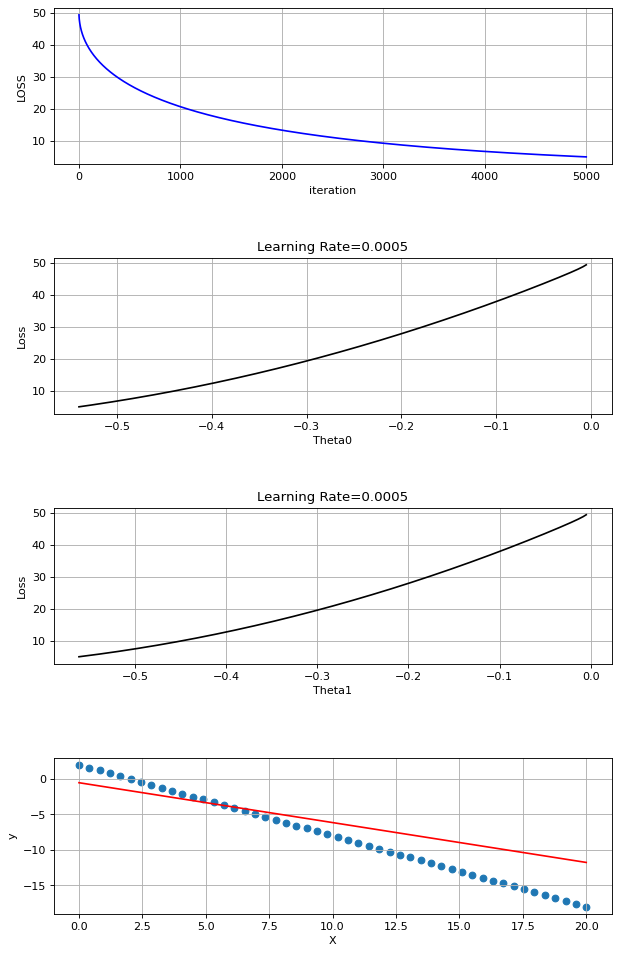

In [ ]:
fig=plt.figure(figsize=(9,15),dpi=80)
fig.subplots_adjust(hspace=0.6)

plt.subplot(4, 1, 1)
itration=list(range(len(loss)))
plt.plot(itration,loss,color="blue")
plt.xlabel("iteration")
plt.ylabel("LOSS")
plt.grid()

plt.subplot(4, 1, 2)
plt.title('Learning Rate=0.0005')
plt.plot(All_Theta_0,loss, color="black")
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.grid()

plt.subplot(4, 1, 3)
plt.title('Learning Rate=0.0005')
plt.plot(All_Theta_1 ,loss, color="black")
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.grid()


plt.subplot(4, 1, 4)
plt.scatter(X, y)
plt.plot
plt.plot(X,y_pred ,color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= ADA(X,y,0.0005,5000,1e-08)

Streaming output truncated to the last 5000 lines.
 14.18475861 14.57136603 14.95797345 15.34458088 15.7311883  16.11779572
 16.50440314 16.89101057]
j = 43.08480969550888
Gradient Vector: [[  7.41912871]
 [107.05291803]]
Gradient Vector Norm:    107.30969540890521
V0 170216.41418541284
V1 35277723.82539484
theta_0_new :      -0.052762141254697206
theta_0_new :      -0.05282082606437235
v_0 170216.41418541284
v_1 35277723.82539484
 ****************** Iteration 2935 ********************
h(x) :   [-0.05276214 -0.07432166 -0.09588118 -0.1174407  -0.13900022 -0.16055975
 -0.18211927 -0.20367879 -0.22523831 -0.24679783 -0.26835735 -0.28991687
 -0.31147639 -0.33303591 -0.35459543 -0.37615495 -0.39771447 -0.419274
 -0.44083352 -0.46239304 -0.48395256 -0.50551208 -0.5270716  -0.54863112
 -0.57019064 -0.59175016 -0.61330968 -0.6348692  -0.65642872 -0.67798825
 -0.69954777 -0.72110729 -0.74266681 -0.76422633 -0.78578585 -0.80734537
 -0.82890489 -0.85046441 -0.87202393 -0.89358345 -0.91514297 -0.

In [ ]:
from sklearn.metrics import r2_score
print("r2_score:",r2_score(y,y_pred))

r2_score: -1.4736441832884104


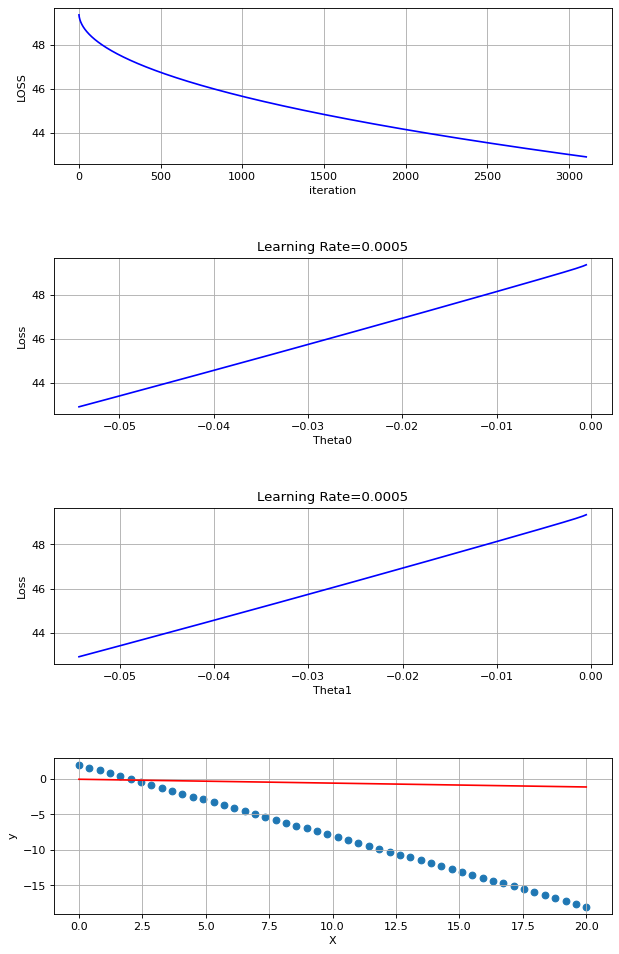

In [ ]:
fig=plt.figure(figsize=(9,15),dpi=80)
fig.subplots_adjust(hspace=0.6)

plt.subplot(4, 1, 1)
itration=list(range(len(loss)))
plt.plot(itration,loss,color="blue")
plt.xlabel("iteration")
plt.ylabel("LOSS")
plt.grid()

plt.subplot(4, 1, 2)
plt.title('Learning Rate=0.0005')
plt.plot(All_Theta_0,loss, color="blue")
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.grid()

plt.subplot(4, 1, 3)
plt.title('Learning Rate=0.0005')
plt.plot(All_Theta_1 ,loss, color="blue")
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.grid()


plt.subplot(4, 1, 4)
plt.scatter(X, y)
plt.plot
plt.plot(X,y_pred ,color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [ ]:
def rms(X,y,alpha,max_iteration,epslon,beta):

    count = 0
    theta_0 = 0
    theta_1 = 0
    m = len(X)
    loss = []
    All_Theta_0 = []
    All_Theta_1 = []
    V0 = 0
    V1 = 0
    all_perdction=[]


    while count < max_iteration:




        print(f' ****************** Iteration {count} ********************')



        y_pred = theta_0 + theta_1 *  X
        print("h(x) :  ",y_pred)
        all_perdction.append(y_pred)

        Error_Vector = (y_pred - y)
        print("Error_Vector :   ",Error_Vector)

        cost =  ( Error_Vector.dot(Error_Vector)) /2/m
        print("j =",cost)

        loss.append(cost)

        d_theta_0 = (1/m) * sum((y_pred - y))
        d_theta_1 = (1/m) * np.dot(y_pred - y , X)

        Gradient_Vector = np.array([d_theta_0,d_theta_1]).reshape(-1, 1)
        print("Gradient Vector:"  ,  Gradient_Vector)


        norm = np.linalg.norm([d_theta_0,d_theta_1])
        print("Gradient Vector Norm:   ",norm)

        V0 = (beta* V0) +((1-beta) *(d_theta_0**2))
        V1 =  (beta* V1) +((1-beta) *(d_theta_1**2))
        print("V0",V0)
        print("V1",V1)




        Ad_lr0 = alpha/(np.sqrt(V0) + epslon)
        Ad_lr1 = alpha/(np.sqrt(V1) + epslon)

        theta_0 = theta_0 - Ad_lr0 * d_theta_0
        theta_1 = theta_1 - Ad_lr1 * d_theta_1

        print("theta_0_new :     ",theta_0)
        print("theta_0_new :     ",theta_1)

        All_Theta_0.append(theta_0)
        All_Theta_1.append(theta_1)




        print("v_0",V0)
        print("v_1",V1)





        count += 1
        if norm < 0.001:
                break

        if count>1:
            # Stopping using cost
            if abs(loss[-1]-loss[-2]) < 0.001:
              break



    return theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1




theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= rms(X,y,0.05,500,1e-08,0.9)
print("****************** Training Report ********************")

print(f'Gradient Descent converged after {count} epochs')
print("theta_0_Opt",theta_0)
print("theta_1_Opt",theta_1)

print("Error Vector:",Error_Vector)
print("cost",cost)
print("h(x) = y_predict:",y_pred)
print("y_actual:",y)


 ****************** Iteration 0 ********************
h(x) :   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error_Vector :    [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
j = 49.34693877551021
Gradient Vector: [[  8.        ]
 [114.69387755]]
Gradient Vector Norm:    114.97254258164628
V0 6.399999999999999
V1 1315.468554768846

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= rms(X,y,0.005,5000,1e-08,0.9)

Streaming output truncated to the last 5000 lines.
v_0 0.18238525380303175
v_1 0.11310646496090368
 ****************** Iteration 377 ********************
h(x) :   [  0.39172001   0.03338466  -0.32495069  -0.68328603  -1.04162138
  -1.39995673  -1.75829208  -2.11662743  -2.47496277  -2.83329812
  -3.19163347  -3.54996882  -3.90830416  -4.26663951  -4.62497486
  -4.98331021  -5.34164556  -5.6999809   -6.05831625  -6.4166516
  -6.77498695  -7.13332229  -7.49165764  -7.84999299  -8.20832834
  -8.56666369  -8.92499903  -9.28333438  -9.64166973 -10.00000508
 -10.35834043 -10.71667577 -11.07501112 -11.43334647 -11.79168182
 -12.15001716 -12.50835251 -12.86668786 -13.22502321 -13.58335856
 -13.9416939  -14.30002925 -14.6583646  -15.01669995 -15.37503529
 -15.73337064 -16.09170599 -16.45004134 -16.80837669 -17.16671203]
Error_Vector :    [-1.60827999 -1.55845207 -1.50862416 -1.45879624 -1.40896832 -1.3591404
 -1.30931249 -1.25948457 -1.20965665 -1.15982873 -1.11000082 -1.0601729
 -1.01034498 -0

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= rms(X,y,0.0005,5000,1e-08,0.9)

Streaming output truncated to the last 5000 lines.
 -10.94079037 -11.23313009 -11.5254698  -11.81780952 -12.11014924
 -12.40248896 -12.69482868 -12.98716839 -13.27950811 -13.57184783
 -13.86418755 -14.15652727 -14.44886699 -14.7412067  -15.03354642]
Error_Vector :    [-2.70890023 -2.59307669 -2.47725314 -2.36142959 -2.24560604 -2.1297825
 -2.01395895 -1.8981354  -1.78231186 -1.66648831 -1.55066476 -1.43484121
 -1.31901767 -1.20319412 -1.08737057 -0.97154703 -0.85572348 -0.73989993
 -0.62407638 -0.50825284 -0.39242929 -0.27660574 -0.1607822  -0.04495865
  0.0708649   0.18668845  0.30251199  0.41833554  0.53415909  0.64998263
  0.76580618  0.88162973  0.99745328  1.11327682  1.22910037  1.34492392
  1.46074747  1.57657101  1.69239456  1.80821811  1.92404165  2.0398652
  2.15568875  2.2715123   2.38733584  2.50315939  2.61898294  2.73480648
  2.85063003  2.96645358]
j = 1.4051383868295755
Gradient Vector: [[ 0.12877667]
 [11.13276824]]
Gradient Vector Norm:    11.133513014769807
V0 0.0330

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [ ]:
def ADm(X,y,alpha,max_iteration,epslon,beta1,beta2):

    count = 0
    theta_0 = 0
    theta_1 = 0
    m = len(X)
    loss = []
    All_Theta_0 = []
    All_Theta_1 = []
    V0 = 0
    V1 = 0
    M0=0
    M1=0
    all_perdction=[]


    while count < max_iteration:




        print(f' ****************** Iteration {count} ********************')



        y_pred = theta_0 + theta_1 *  X
        print("h(x) :  ",y_pred)
        all_perdction.append(y_pred)

        Error_Vector = (y_pred - y)
        print("Error_Vector :   ",Error_Vector)

        cost =  ( Error_Vector.dot(Error_Vector)) /2/m
        print("j =",cost)

        loss.append(cost)

        d_theta_0 = (1/m) * sum((y_pred - y))
        d_theta_1 = (1/m) * np.dot(y_pred - y , X)

        Gradient_Vector = np.array([d_theta_0,d_theta_1]).reshape(-1, 1)
        print("Gradient Vector:"  ,  Gradient_Vector)


        norm = np.linalg.norm([d_theta_0,d_theta_1])
        print("Gradient Vector Norm:   ",norm)


        M0 = (beta1 * M0) + ((1-beta1)*d_theta_0)
        M1 = (beta1 * M1) + ((1-beta1)*d_theta_1)

        V0 = (beta2 * V0) + ((1-beta2)*(d_theta_0**2))
        V1 = (beta2 * V1) + ((1-beta2)*(d_theta_1**2))

        M0_history = M0 /(1-((beta1)**(count+1)))
        M1_history = M1 /(1-((beta1)**(count+1)))

        V0_history = V0 /(1-((beta2)**(count+1)))
        V1_history = V1 /(1-((beta2)**(count+1)))


        print("V0",V0)
        print("V1",V1)



        Ad_lr0 = alpha/(np.sqrt(V0_history) + epslon)
        Ad_lr1 = alpha/(np.sqrt(V1_history) + epslon)

        theta_0 = theta_0 - Ad_lr0 * M0_history
        theta_1 = theta_1 - Ad_lr1 * M1_history

        print("theta_0_new :     ",theta_0)
        print("theta_0_new :     ",theta_1)

        All_Theta_0.append(theta_0)
        All_Theta_1.append(theta_1)




        print("v_0",V0)
        print("v_1",V1)





        count += 1
        if norm < 0.001:
                break

        if count>1:
            # Stopping using cost
            if abs(loss[-1]-loss[-2]) < 0.001:
              break



    return theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1




theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= ADm(X,y,0.05,500,1e-08,0.05,0.7)
print("****************** Training Report ********************")

print(f'Gradient Descent converged after {count} epochs')
print("theta_0_Opt",theta_0)
print("theta_1_Opt",theta_1)

print("Error Vector:",Error_Vector)
print("cost",cost)
print("h(x) = y_predict:",y_pred)
print("y_actual:",y)


 ****************** Iteration 0 ********************
h(x) :   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error_Vector :    [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
j = 49.34693877551021
Gradient Vector: [[  8.        ]
 [114.69387755]]
Gradient Vector Norm:    114.97254258164628
V0 19.200000000000003
V1 3946.40566430654

##### The following results uses alpha = 0.05, beta1 = 0.05, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [ ]:
theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= ADm(X,y,0.005,500,1e-08,0.5,0.8)

Streaming output truncated to the last 5000 lines.
 -12.16244303 -12.51559535 -12.86874767 -13.22189998 -13.5750523
 -13.92820461 -14.28135693 -14.63450925 -14.98766156 -15.34081388
 -15.69396619 -16.04711851 -16.40027083 -16.75342314 -17.10657546]
Error_Vector :    [-1.80211197 -1.74710102 -1.69209007 -1.63707912 -1.58206817 -1.52705722
 -1.47204627 -1.41703533 -1.36202438 -1.30701343 -1.25200248 -1.19699153
 -1.14198058 -1.08696963 -1.03195868 -0.97694773 -0.92193678 -0.86692583
 -0.81191488 -0.75690393 -0.70189299 -0.64688204 -0.59187109 -0.53686014
 -0.48184919 -0.42683824 -0.37182729 -0.31681634 -0.26180539 -0.20679444
 -0.15178349 -0.09677254 -0.04176159  0.01324935  0.0682603   0.12327125
  0.1782822   0.23329315  0.2883041   0.34331505  0.398326    0.45333695
  0.5083479   0.56335885  0.6183698   0.67338074  0.72839169  0.78340264
  0.83841359  0.89342454]
j = 0.41831765231351953
Gradient Vector: [[-0.45434371]
 [ 0.13249354]]
Gradient Vector Norm:    0.4732681578993856
V0 0.21

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= ADm(X,y,0.0005,5000,1e-08,0.8,0.8)

Streaming output truncated to the last 5000 lines.
V0 0.04806925187527646
V1 152.07155238287973
theta_0_new :      -0.7098760786377704
theta_0_new :      -0.7099737526337188
v_0 0.04806925187527646
v_1 152.07155238287973
 ****************** Iteration 1420 ********************
h(x) :   [ -0.70987608  -0.99966128  -1.28944649  -1.57923169  -1.8690169
  -2.1588021   -2.44858731  -2.73837251  -3.02815772  -3.31794293
  -3.60772813  -3.89751334  -4.18729854  -4.47708375  -4.76686895
  -5.05665416  -5.34643936  -5.63622457  -5.92600977  -6.21579498
  -6.50558018  -6.79536539  -7.08515059  -7.3749358   -7.664721
  -7.95450621  -8.24429141  -8.53407662  -8.82386182  -9.11364703
  -9.40343223  -9.69321744  -9.98300264 -10.27278785 -10.56257305
 -10.85235826 -11.14214346 -11.43192867 -11.72171387 -12.01149908
 -12.30128428 -12.59106949 -12.8808547  -13.1706399  -13.46042511
 -13.75021031 -14.03999552 -14.32978072 -14.61956593 -14.90935113]
Error_Vector :    [-2.70987608 -2.59149802 -2.47311996 -

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= ADm(X,y,0.001,5000,1e-08,0.9,0.99)

Streaming output truncated to the last 5000 lines.
V0 1.0458768393705085
V1 442.0558757251589
theta_0_new :      -0.6673384268382467
theta_0_new :      -0.7279501050380758
v_0 1.0458768393705085
v_1 442.0558757251589
 ****************** Iteration 899 ********************
h(x) :   [ -0.66733843  -0.96446092  -1.26158341  -1.5587059   -1.85582839
  -2.15295089  -2.45007338  -2.74719587  -3.04431836  -3.34144085
  -3.63856335  -3.93568584  -4.23280833  -4.52993082  -4.82705331
  -5.1241758   -5.4212983   -5.71842079  -6.01554328  -6.31266577
  -6.60978826  -6.90691076  -7.20403325  -7.50115574  -7.79827823
  -8.09540072  -8.39252321  -8.68964571  -8.9867682   -9.28389069
  -9.58101318  -9.87813567 -10.17525817 -10.47238066 -10.76950315
 -11.06662564 -11.36374813 -11.66087063 -11.95799312 -12.25511561
 -12.5522381  -12.84936059 -13.14648308 -13.44360558 -13.74072807
 -14.03785056 -14.33497305 -14.63209554 -14.92921804 -15.22634053]
Error_Vector :    [-2.66733843e+00 -2.55629765e+00 -2.4452

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= ADm(X,y,0.001,5000,1e-08,0.9,0.5)

Streaming output truncated to the last 5000 lines.
  5.12488198  5.28598363]
j = 3.5988847575159344
Gradient Vector: [[ 1.33899303]
 [27.08357119]]
Gradient Vector Norm:    27.11665042955098
V0 1.8241089415610783
V1 741.7818423620777
theta_0_new :      -0.609065492774033
theta_0_new :      -0.6063452458085951
v_0 1.8241089415610783
v_1 741.7818423620777
 ****************** Iteration 595 ********************
h(x) :   [ -0.60906549  -0.85655335  -1.1040412   -1.35152906  -1.59901691
  -1.84650477  -2.09399263  -2.34148048  -2.58896834  -2.83645619
  -3.08394405  -3.3314319   -3.57891976  -3.82640761  -4.07389547
  -4.32138332  -4.56887118  -4.81635904  -5.06384689  -5.31133475
  -5.5588226   -5.80631046  -6.05379831  -6.30128617  -6.54877402
  -6.79626188  -7.04374973  -7.29123759  -7.53872544  -7.7862133
  -8.03370116  -8.28118901  -8.52867687  -8.77616472  -9.02365258
  -9.27114043  -9.51862829  -9.76611614 -10.013604   -10.26109185
 -10.50857971 -10.75606757 -11.00355542 -11.25104328 

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= ADm(X,y,0.001,5000,1e-08,0.5,0.99)

Streaming output truncated to the last 5000 lines.
  0.60714566  0.71614383  0.82514199  0.93414015  1.04313831  1.15213648
  1.26113464  1.3701328   1.47913097  1.58812913  1.69712729  1.80612545
  1.91512362  2.02412178  2.13311994  2.24211811  2.35111627  2.46011443
  2.56911259  2.67811076]
j = 1.2370967303368532
Gradient Vector: [[7.65576605e-03]
 [9.34140151e+00]]
Gradient Vector Norm:    9.341404645654785
V0 0.8835694738681953
V1 391.66993795713455
theta_0_new :      -0.6628124797701308
theta_0_new :      -0.7334297553195473
v_0 0.8835694738681953
v_1 391.66993795713455
 ****************** Iteration 926 ********************
h(x) :   [ -0.66281248  -0.96217156  -1.26153065  -1.56088973  -1.86024881
  -2.1596079   -2.45896698  -2.75832607  -3.05768515  -3.35704423
  -3.65640332  -3.9557624   -4.25512149  -4.55448057  -4.85383965
  -5.15319874  -5.45255782  -5.7519169   -6.05127599  -6.35063507
  -6.64999416  -6.94935324  -7.24871232  -7.54807141  -7.84743049
  -8.14678957  -8.4461

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= ADm(X,y,0.001,5000,1e-08,0.5,0.5)

Streaming output truncated to the last 5000 lines.
  1.82121417  1.96978766  2.11836115  2.26693464  2.41550813  2.56408163
  2.71265512  2.86122861  3.0098021   3.15837559  3.30694909  3.45552258
  3.60409607  3.75266956  3.90124306  4.04981655  4.19839004  4.34696353
  4.49553702  4.64411052]
j = 2.8025320488647854
Gradient Vector: [[ 1.00405996]
 [22.66934642]]
Gradient Vector Norm:    22.69157119617821
V0 1.0305876713278497
V1 520.5220110726957
theta_0_new :      -0.6369904837865561
theta_0_new :      -0.6369949038716799
v_0 1.0305876713278497
v_1 520.5220110726957
 ****************** Iteration 637 ********************
h(x) :   [ -0.63699048  -0.8969884   -1.15698632  -1.41698424  -1.67698216
  -1.93698008  -2.196978    -2.45697592  -2.71697384  -2.97697176
  -3.23696968  -3.4969676   -3.75696552  -4.01696344  -4.27696136
  -4.53695928  -4.7969572   -5.05695512  -5.31695304  -5.57695096
  -5.83694888  -6.0969468   -6.35694472  -6.61694264  -6.87694056
  -7.13693848  -7.3969364   -7

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta_0 , theta_1 ,loss , count , All_Theta_0,All_Theta_1,Error_Vector,y_pred,cost,V0,V1= ADm(X,y,0.01,5000,1e-08,0.9,0.99)

Streaming output truncated to the last 5000 lines.
 -8.21809174e+00 -8.57523169e+00 -8.93237165e+00 -9.28951160e+00
 -9.64665155e+00 -1.00037915e+01 -1.03609315e+01 -1.07180714e+01
 -1.10752114e+01 -1.14323513e+01 -1.17894913e+01 -1.21466312e+01
 -1.25037712e+01 -1.28609111e+01 -1.32180511e+01 -1.35751910e+01
 -1.39323310e+01 -1.42894709e+01 -1.46466109e+01 -1.50037509e+01
 -1.53608908e+01 -1.57180308e+01 -1.60751707e+01 -1.64323107e+01
 -1.67894506e+01 -1.71465906e+01]
Error_Vector :    [-1.64673286 -1.59570955 -1.54468624 -1.49366292 -1.44263961 -1.3916163
 -1.34059299 -1.28956968 -1.23854636 -1.18752305 -1.13649974 -1.08547643
 -1.03445312 -0.98342981 -0.93240649 -0.88138318 -0.83035987 -0.77933656
 -0.72831325 -0.67728993 -0.62626662 -0.57524331 -0.52422    -0.47319669
 -0.42217337 -0.37115006 -0.32012675 -0.26910344 -0.21808013 -0.16705681
 -0.1160335  -0.06501019 -0.01398688  0.03703643  0.08805975  0.13908306
  0.19010637  0.24112968  0.29215299  0.34317631  0.39419962  0.445222

## Congratulations
![image.png](attachment:image.png)